In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections

from scipy.stats import boxcox
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Prepared_Data/previous_application.csv")
df.head()

SK_ID_CURR  TARGET  pa_total_term  pa_total_down_payment_rate  \
0    100002.0     1.0           24.0                    0.000000   
1    100003.0     0.0           30.0                    0.100061   
2    100004.0     0.0            4.0                    0.212008   
3    100006.0     0.0          138.0                    0.326824   
4    100007.0     0.0          124.0                    0.319033   

   pa_not_full_credit_times  pa_most_frequent_term  pa_max_term  \
0                       0.0                   24.0         24.0   
1                       2.0                   12.0         12.0   
2                       0.0                    4.0          4.0   
3                       2.0                   30.0         48.0   
4                       3.0                   12.0         48.0   

   pa_max_down_payment_rate  pa_earliest_decision_day  \
0                  0.000000                    -606.0   
1                  0.100061                   -2341.0   
2                  0.212008                    -815.0   
3                  0.217830                    -617.0   
4                  0.218890                   -2357.0   

   pa_NAME_YIELD_GROUP_high  ip_total_late_times  ip_payment_count_6m  \
0                  0.000000                  0.0                  5.0   
1                  0.000000                  0.0                  0.0   
2                  0.000000                  0.0                  0.0   
3                  0.222222                  0.0                  7.0   
4                  0.500000                 16.0                  6.0   

   ip_payment_count_1y  ip_payment_count  ip_avg_instl  pcb_avg_inst  \
0                 11.0              19.0     19.000000     24.000000   
1                  0.0              25.0      8.333333      9.791667   
2                  0.0               3.0      3.000000      3.750000   
3                 11.0              16.0      5.333333     12.888889   
4                 12.0              66.0     12.600000     15.066667   

   pa_avg_term  pa_avg_down_payment_rate  pa_avg_application  pa_avg_annuity  \
0    24.000000                  0.000000           179055.00        9251.775   
1    10.000000                  0.050030           435436.50       56553.990   
2     4.000000                  0.212008            24282.00        5357.250   
3    23.000000                  0.163412           272203.26       23651.175   
4    20.666667                  0.159516           150530.25       12278.805   

   pa_PRODUCT_COMBINATION_Cash X-Sell: low  pa_NAME_YIELD_GROUP_low_action  \
0                                 0.000000                             0.0   
1                                 0.333333                             0.0   
2                                 0.000000                             0.0   
3                                 0.222222                             0.0   
4                                 0.000000                             0.0   

   pa_NAME_PRODUCT_TYPE_x-sell  pa_NAME_CONTRACT_TYPE_Consumer loans  \
0                     0.000000                              1.000000   
1                     0.333333                              0.666667   
2                     0.000000                              1.000000   
3                     0.444444                              0.222222   
4                     0.500000                              0.333333   

   pa_NAME_CONTRACT_TYPE_Cash loans  pa_CODE_REJECT_REASON_XAP  \
0                          0.000000                   1.000000   
1                          0.333333                   1.000000   
2                          0.000000                   1.000000   
3                          0.555556                   0.888889   
4                          0.666667                   1.000000   

   ip_total_less_amount  ip_recent_total_late_times  \
0                 0.000                         0.0   
1                 0.000                         0.0   
2                 0.000        

In [3]:
df.shape

(307511, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SK_ID_CURR                               307511 non-null  float64
 1   TARGET                                   307511 non-null  float64
 2   pa_total_term                            307511 non-null  float64
 3   pa_total_down_payment_rate               307511 non-null  float64
 4   pa_not_full_credit_times                 307511 non-null  float64
 5   pa_most_frequent_term                    307511 non-null  float64
 6   pa_max_term                              307511 non-null  float64
 7   pa_max_down_payment_rate                 307511 non-null  float64
 8   pa_earliest_decision_day                 307511 non-null  float64
 9   pa_NAME_YIELD_GROUP_high                 307511 non-null  float64
 10  ip_total_late_times             

In [5]:
df = df.fillna(0)

In [6]:
df = df.replace([np.inf, -np.inf], 0)

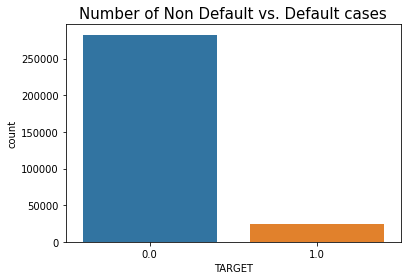

In [7]:
#Default vs. Non-Default
sns.countplot('TARGET', data=df)
plt.title('Number of Non Default vs. Default cases', fontsize = 15);

In [8]:
df.TARGET.value_counts()[1]

24825

In [9]:
print('Percentage of No Frauds: {}%'.format(round(df.TARGET.value_counts()[0]/len(df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df.TARGET.value_counts()[1]/len(df) * 100.0,2)))

Percentage of No Frauds: 91.93%
Percentage of Frauds: 8.07%


In [10]:
df.head()

SK_ID_CURR  TARGET  pa_total_term  pa_total_down_payment_rate  \
0    100002.0     1.0           24.0                    0.000000   
1    100003.0     0.0           30.0                    0.100061   
2    100004.0     0.0            4.0                    0.212008   
3    100006.0     0.0          138.0                    0.326824   
4    100007.0     0.0          124.0                    0.319033   

   pa_not_full_credit_times  pa_most_frequent_term  pa_max_term  \
0                       0.0                   24.0         24.0   
1                       2.0                   12.0         12.0   
2                       0.0                    4.0          4.0   
3                       2.0                   30.0         48.0   
4                       3.0                   12.0         48.0   

   pa_max_down_payment_rate  pa_earliest_decision_day  \
0                  0.000000                    -606.0   
1                  0.100061                   -2341.0   
2                  0.212008                    -815.0   
3                  0.217830                    -617.0   
4                  0.218890                   -2357.0   

   pa_NAME_YIELD_GROUP_high  ip_total_late_times  ip_payment_count_6m  \
0                  0.000000                  0.0                  5.0   
1                  0.000000                  0.0                  0.0   
2                  0.000000                  0.0                  0.0   
3                  0.222222                  0.0                  7.0   
4                  0.500000                 16.0                  6.0   

   ip_payment_count_1y  ip_payment_count  ip_avg_instl  pcb_avg_inst  \
0                 11.0              19.0     19.000000     24.000000   
1                  0.0              25.0      8.333333      9.791667   
2                  0.0               3.0      3.000000      3.750000   
3                 11.0              16.0      5.333333     12.888889   
4                 12.0              66.0     12.600000     15.066667   

   pa_avg_term  pa_avg_down_payment_rate  pa_avg_application  pa_avg_annuity  \
0    24.000000                  0.000000           179055.00        9251.775   
1    10.000000                  0.050030           435436.50       56553.990   
2     4.000000                  0.212008            24282.00        5357.250   
3    23.000000                  0.163412           272203.26       23651.175   
4    20.666667                  0.159516           150530.25       12278.805   

   pa_PRODUCT_COMBINATION_Cash X-Sell: low  pa_NAME_YIELD_GROUP_low_action  \
0                                 0.000000                             0.0   
1                                 0.333333                             0.0   
2                                 0.000000                             0.0   
3                                 0.222222                             0.0   
4                                 0.000000                             0.0   

   pa_NAME_PRODUCT_TYPE_x-sell  pa_NAME_CONTRACT_TYPE_Consumer loans  \
0                     0.000000                              1.000000   
1                     0.333333                              0.666667   
2                     0.000000                              1.000000   
3                     0.444444                              0.222222   
4                     0.500000                              0.333333   

   pa_NAME_CONTRACT_TYPE_Cash loans  pa_CODE_REJECT_REASON_XAP  \
0                          0.000000                   1.000000   
1                          0.333333                   1.000000   
2                          0.000000                   1.000000   
3                          0.555556                   0.888889   
4                          0.666667                   1.000000   

   ip_total_less_amount  ip_recent_total_late_times  \
0                 0.000                         0.0   
1                 0.000                         0.0   
2                 0.000        

In [13]:
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
from scipy.stats import shapiro
stat, p = shapiro(df['AVG_INSTALLMENT_AMOUNT'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
# q-q plot
#qqplot(df['AVG_INSTALLMENT_AMOUNT'], line='s')
#plt.show()

Statistics=0.417, p=0.000
Sample does not look Gaussian (reject H0)


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df['TARGET']
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_sample(X,y)

In [12]:
df_rs = pd.merge(X_rs, y_rs, left_index=True,right_index=True)
df_rs.shape

(49650, 31)

In [13]:
def naive_predictor(df):
    TP = df.TARGET.count() - np.sum(df.TARGET)
    FP = np.sum(df.TARGET)
    TN = 0
    FN = 0
    
    # TODO: Calculate accuracy, precision and recall
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    
    # TODO: Calculate F-score using the formula above for beta = 1 and correct values for precision and recall.
    fscore = (2*precision*recall)/(precision + recall)
    
    # Print the results 
    print("[Accuracy score: {:.4f}, precision: {:.4f}, recall: {:.4f}, f1-score: {:.4f}]".format(accuracy, precision, recall, fscore))
    
print('Naive predictor for original dataset:')
naive_predictor(df)
print('-'*117)
print('Naive predictor for undersampled dataset:')
naive_predictor(df_rs)

Naive predictor for original dataset:
[Accuracy score: 0.9193, precision: 0.9193, recall: 1.0000, f1-score: 0.9579]
---------------------------------------------------------------------------------------------------------------------
Naive predictor for undersampled dataset:
[Accuracy score: 0.5000, precision: 0.5000, recall: 1.0000, f1-score: 0.6667]


In [14]:
# Undersampling before cross validation(prove to overfit)
X = df_rs.drop(['TARGET'], axis=1)
y = df_rs['TARGET']

In [15]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [22]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Support Vector Classifier": LinearSVC(dual=False, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(max_depth = 6, n_jobs=-1),
    "Gradient Boosting":XGBClassifier(objective='binary:logistic',max_depth =3, n_estimators=10, eval_metric='logloss', seed=123, n_jobs=-1,verbosity=3)
}

In [23]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train_stand, y_train)
        cv_score = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))
    

Cross-Validation Scores:-
Logistic Regression: 61.16 : 57.16 : 61.96 : 65.19
Support Vector Classifier: 60.97 : 56.98 : 61.72 : 65.07
Decision Tree: 54.21 : 53.77 : 53.5 : 54.11
RandomForest: 60.87 : 53.25 : 62.44 : 65.17
[19:29:17] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/gbm/gbtree.cc:154: Using tree method: 2
[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_pr

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:29:17] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:29:17] ======== Monitor: Learner ========
[19:29:17] Configure: 1e-06s, 1 calls @ 1us

[19:29:17] EvalOneIter: 4.9e-05s, 10 calls @ 49us

[19:29:17] GetGradient: 0.006334s, 10 calls @ 6334us

[19:29:17] PredictRaw: 0.013485s, 10 calls @ 13485us

[19:29:17] UpdateOneIter: 0.183406s, 10 calls @ 183406us

[19:29:17] ======== Monitor: GBTree ========
[19:29:17] BoostNewTrees: 0.203999s, 10 calls @ 203999us

[19:29:17] CommitModel: 1.1e-05s, 10 calls @ 11us

In [24]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "RandomForest": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "Gradient Boosting":{
     "eta"    : [0.05, 0.10, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5],
     "gamma"            : [ 0.1, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
     }

}

In [25]:
#Using Grid search for finding the most optimal hyperparameters
def randomsearch(classifier, params):
    k = StratifiedKFold(n_splits=10)
    grid_classifier = RandomizedSearchCV(classifier, params, cv = k, n_jobs=-1)
    grid_classifier.fit(X_train_stand, y_train)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [26]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params,n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [27]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = randomsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train_stand, y_train, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-
Logistic Regression: 61.01 : 57.05 : 61.99 : 65.13


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Support Vector Classifier: 60.93 : 57.06 : 61.8 : 65.04


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Decision Tree: 57.03 : 46.03 : 58.91 : 59.05


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomForest: 59.63 : 48.68 : 62.2 : 63.84


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:29] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:32:29] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:32:29] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:32:29] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[19:32:29] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[19:32:29] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/upda

In [28]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

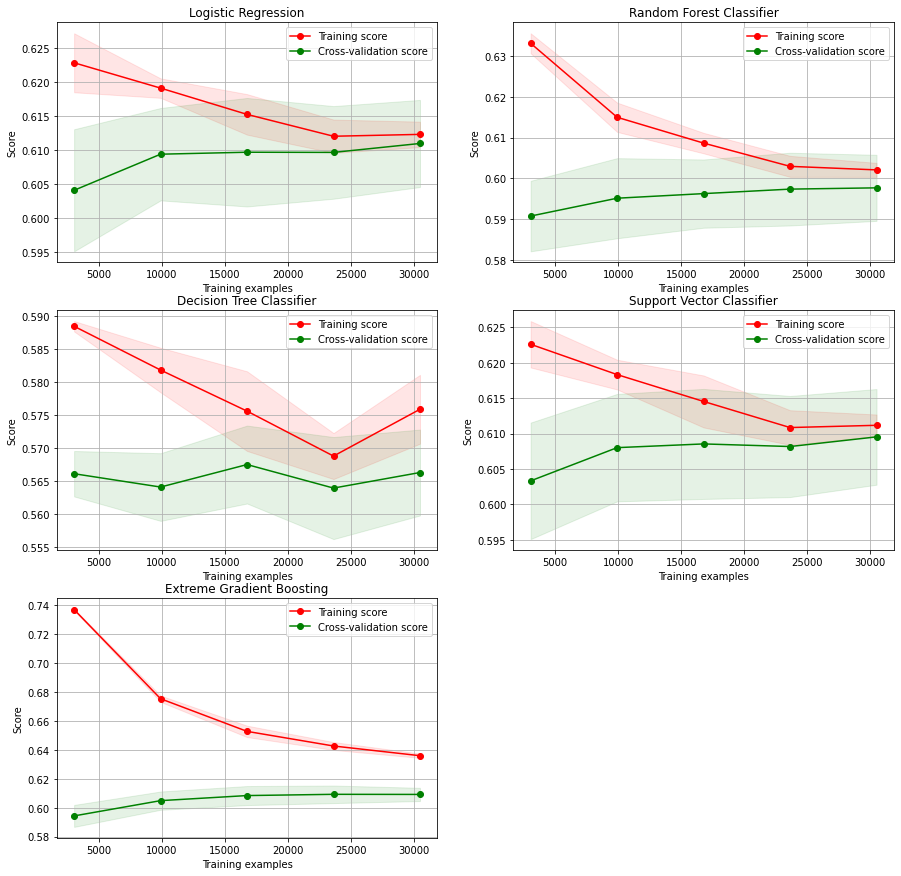

In [29]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]
svc = hyperparameter_tuned_classfier["Support Vector Classifier"]
decision_tree = hyperparameter_tuned_classfier["Decision Tree"]
RandomForest = hyperparameter_tuned_classfier["RandomForest"]
xgboost = hyperparameter_tuned_classfier["Gradient Boosting"]

#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plot_learning_curve(log_reg, 'Logistic Regression', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,2)
plot_learning_curve(RandomForest, 'Random Forest Classifier', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,3)
plot_learning_curve(decision_tree, 'Decision Tree Classifier', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,4)
plot_learning_curve(svc, 'Support Vector Classifier', X_train_stand, y_train, n_jobs=-1)

plt.subplot(3,2,5)
plot_learning_curve(xgboost, 'Extreme Gradient Boosting', X_train_stand, y_train, n_jobs=-1)

#plt.show()

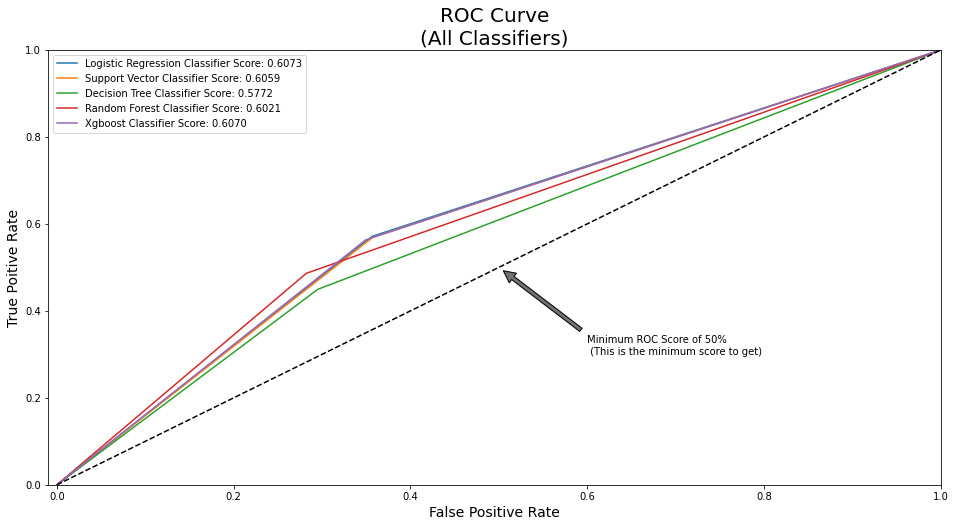

In [30]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test_stand)
svc_pred = svc.predict(X_test_stand)
tree_pred = decision_tree.predict(X_test_stand)
RandomForeest_pred = RandomForest.predict(X_test_stand)
Xgboost_pred = xgboost.predict(X_test_stand)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, RandomForeest_pred)
xgboost_fpr, xgboost_tpr, xgboost_threshold = roc_curve(y_test, Xgboost_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))

plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, RandomForeest_pred)))
plt.plot(xgboost_fpr, xgboost_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, Xgboost_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

In [31]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))

print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))

print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test, RandomForeest_pred, target_names=labels))

print('Extreme Gradient Boosting Classifier:')
print(classification_report(y_test, Xgboost_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.59      0.64      0.62      4710
     Default       0.62      0.57      0.60      4824

    accuracy                           0.61      9534
   macro avg       0.61      0.61      0.61      9534
weighted avg       0.61      0.61      0.61      9534

Support Vector Classifier:
              precision    recall  f1-score   support

 Non-Default       0.59      0.64      0.62      4710
     Default       0.62      0.57      0.59      4824

    accuracy                           0.61      9534
   macro avg       0.61      0.61      0.61      9534
weighted avg       0.61      0.61      0.60      9534

Decision Tree:
              precision    recall  f1-score   support

 Non-Default       0.56      0.70      0.62      4710
     Default       0.61      0.45      0.52      4824

    accuracy                           0.58      9534
   macro avg       0.58      0.58      0.57      9534
weighted av

In [32]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3030 1680]
 [2068 2756]]
Confusion matrix, without normalization
[[3028 1682]
 [2080 2744]]
Confusion matrix, without normalization
[[3320 1390]
 [2656 2168]]
Confusion matrix, without normalization
[[3381 1329]
 [2478 2346]]
Confusion matrix, without normalization
[[3065 1645]
 [2107 2717]]
Confusion matrix, without normalization
[[4710    0]
 [   0 4824]]


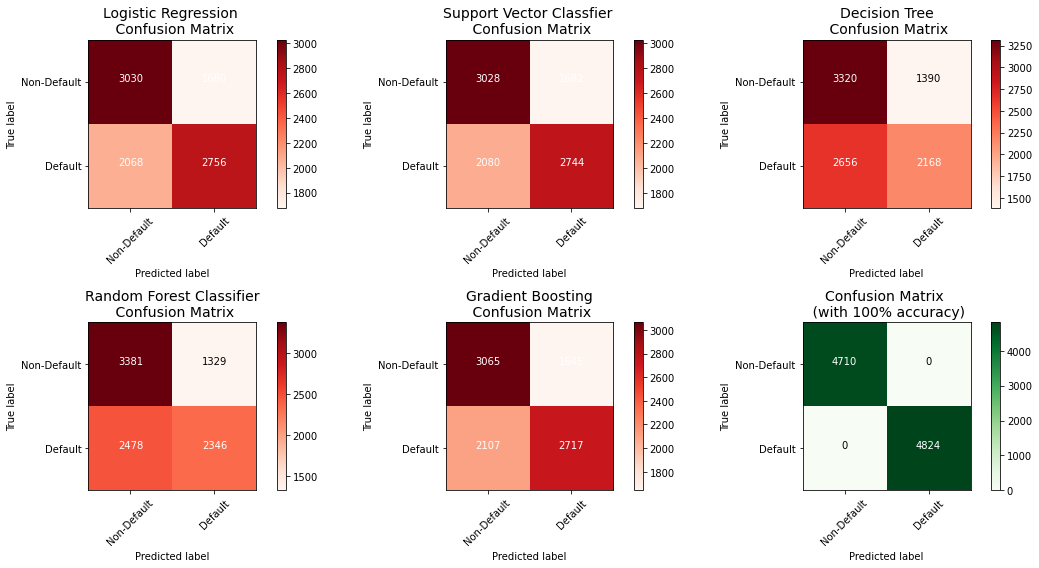

In [33]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test_stand))
svc_cm = confusion_matrix(y_test, svc.predict(X_test_stand))
dt_cm = confusion_matrix(y_test, decision_tree.predict(X_test_stand))
RF_cm = confusion_matrix(y_test, RandomForest.predict(X_test_stand))
xgboost_cm = confusion_matrix(y_test, xgboost.predict(X_test_stand))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(16,8))

fig.add_subplot(231)
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(232)
plot_confusion_matrix(svc_cm, labels, title="Support Vector Classfier \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(233)
plot_confusion_matrix(dt_cm, labels, title="Decision Tree\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(234)
plot_confusion_matrix(RF_cm, labels, title="Random Forest Classifier\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(235)
plot_confusion_matrix(xgboost_cm, labels, title="Gradient Boosting\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(236)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()

Logistic - Regression Feature: 0, Score: 0.01489
Logistic - Regression Feature: 1, Score: -0.00166
Logistic - Regression Feature: 2, Score: -0.07526
Logistic - Regression Feature: 3, Score: -0.11614
Logistic - Regression Feature: 4, Score: 0.16174
Logistic - Regression Feature: 5, Score: 0.06747
Logistic - Regression Feature: 6, Score: 0.08345
Logistic - Regression Feature: 7, Score: 0.08647
Logistic - Regression Feature: 8, Score: 0.09634
Logistic - Regression Feature: 9, Score: 0.07290
Logistic - Regression Feature: 10, Score: -0.08181
Logistic - Regression Feature: 11, Score: 0.06407
Logistic - Regression Feature: 12, Score: -0.21869
Logistic - Regression Feature: 13, Score: 0.01476
Logistic - Regression Feature: 14, Score: -0.14949
Logistic - Regression Feature: 15, Score: 0.18441
Logistic - Regression Feature: 16, Score: 0.01089
Logistic - Regression Feature: 17, Score: 0.07825
Logistic - Regression Feature: 18, Score: -0.00362
Logistic - Regression Feature: 19, Score: 0.04425
Log

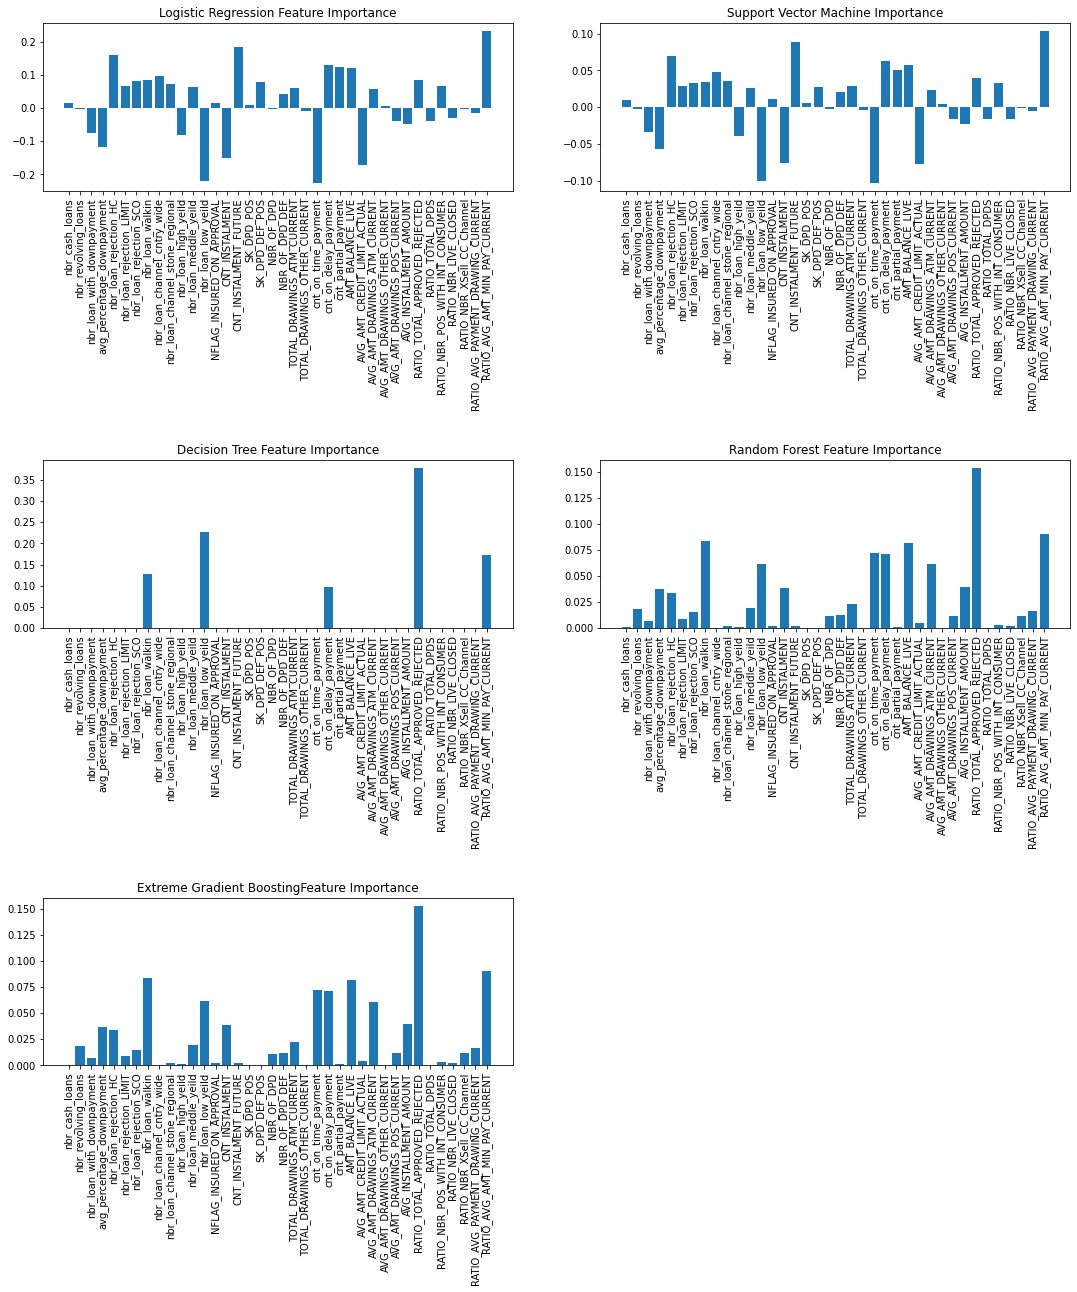

In [34]:
cols = list(X.columns)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
importance_log_reg = log_reg.coef_[0]

for i,v in enumerate(importance_log_reg):
    print('Logistic - Regression Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_log_reg)
plt.xticks(rotation = 90)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,2)
importance_svc = svc.coef_[0]
print(importance_svc)
for i,v in enumerate(importance_svc):
    print('SVM: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_svc)
plt.xticks(rotation = 90)
plt.title("Support Vector Machine Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,3)
# get importance
importance_decision_tree = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decision_tree):
	print('Decision Tree-Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_decision_tree)
plt.xticks(rotation = 90)
plt.title("Decision Tree Feature Importance")

plt.subplot(3,2,4)
importance_RandomForest = RandomForest.feature_importances_
for i,v in enumerate(importance_RandomForest):
	print('Random Forest Feature: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")

plt.subplot(3,2,5)
importance_Xgboost = xgboost.feature_importances_
for i,v in enumerate(importance_Xgboost):
	print('Extreme Gradient Boosting: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Extreme Gradient BoostingFeature Importance")
plt.xticks(rotation = 90) 
plt.show()



In [35]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package

In [36]:
feature_names = X_train_stand.columns

In [37]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_stand.values, 
                                                   feature_names=feature_names, 
                                                   class_names=["Non Default", "Default"], 
                                                   verbose=True, mode='classification')

In [38]:
predict_fn_lg = lambda x: log_reg.predict_proba(x).astype(float)
predict_fn_svm = lambda x: svc._predict_proba_lr(x).astype(float)
predict_fn_dt = lambda x: decision_tree.predict_proba(x).astype(float)
predict_fn_rf = lambda x: RandomForest.predict_proba(x).astype(float)
predict_fn_xgboost = lambda x: xgboost.predict_proba(x).astype(float)

In [39]:
np.random.seed(1)
i = 19
exp_lg = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_lg, num_features=5)
exp_svm = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_svm, num_features=5)
exp_dt = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_dt, num_features=5)
exp_rf = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_rf, num_features=5)
exp_xgboost = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_xgboost, num_features=5)
#exp_lg.show_in_notebook(show_all=False)

Intercept 0.525234317235927
Prediction_local [0.58441674]
Right: 4.5254925478506093e-299
Intercept 0.5263267174001798
Prediction_local [0.47330798]
Right: 1.3314979178147033e-141
Intercept 0.420282892267552
Prediction_local [0.67789102]
Right: 0.6218304757304999
Intercept 0.5299427782957464
Prediction_local [0.62160902]
Right: 0.5414884048811449
Intercept 0.5872420458960556
Prediction_local [0.58404455]
Right: 0.6027694344520569


In [40]:
exp_lg.show_in_notebook()

In [41]:
exp_dt.show_in_notebook()

In [42]:
exp_rf.show_in_notebook()

In [43]:
exp_xgboost.show_in_notebook()

In [44]:
X_train.head()

nbr_cash_loans  nbr_revolving_loans  nbr_loan_with_downpayment  \
29230               3                    1                          4   
16123               0                    0                          1   
2715                0                    0                          0   
23272               0                    0                          1   
47306               1                    0                          0   

       avg_percentage_downpayment  nbr_loan_rejection_HC  \
29230                    0.090540                      0   
16123                    0.217818                      0   
2715                     0.000000                      0   
23272                    0.098391                      0   
47306                    0.000000                      0   

       nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  nbr_loan_walkin  \
29230                         0                       3                0   
16123                         0                       0                0   
2715                          0                       0                0   
23272                         0                       0                0   
47306                         0                       0                1   

       nbr_loan_channel_cntry_wide  nbr_loan_channel_stone_regional  \
29230                            8                                0   
16123                            0                                1   
2715                             0                                1   
23272                            0                                1   
47306                            0                                0   

       nbr_loan_high_yeild  nbr_loan_meddle_yeild  nbr_loan_low_yeild  \
29230                    1                      7                   1   
16123                    0                      0                   1   
2715                     0                      0                   1   
23272                    1                      0                   0   
47306                    0                      1                   0   

       NFLAG_INSURED_ON_APPROVAL  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
29230                        1.0            39.0                    1.0   
16123                        0.0            18.0                    0.0   
2715                         1.0             5.0                    0.0   
23272                        0.0            12.0                    3.0   
47306                        1.0            18.0                    0.0   

       SK_DPD_POS  SK_DPD_DEF_POS  NBR_OF_DPD  NBR_OF_DPD_DEF  \
29230         0.0             0.0         0.0             0.0   
16123         0.0             0.0         0.0             0.0   
2715          0.0             0.0         0.0             0.0   
23272         0.0             0.0         0.0             0.0   
47306         0.0             0.0         0.0             0.0   

       TOTAL_DRAWINGS_ATM_CURRENT  TOTAL_DRAWINGS_OTHER_CURRENT  \
29230                        34.0                           0.0   
16123                         0.0                           0.0   
2715                          0.0                           0.0   
23272                         0.0                           0.0   
47306                         0.0                           0.0   

       cnt_on_time_payment  cnt_on_delay_payment  cnt_partial_payment  \
29230                 73.0                   4.0                  0.0   
16123                 18.0                   0.0                  0.0   
2715                   5.0                   0.0                  0.0   
23272                  9.0                   0.0                  0.0   
47306                 18.0                   0.0                  0.0   

       AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
29230               0.0                     360000.0   
16123               0.0                          0.0   
2715                0.0         

In [45]:
final_cols = X_train_stand.columns
final_cols

Index(['nbr_cash_loans', 'nbr_revolving_loans', 'nbr_loan_with_downpayment',
       'avg_percentage_downpayment', 'nbr_loan_rejection_HC',
       'nbr_loan_rejection_LIMIT', 'nbr_loan_rejection_SCO', 'nbr_loan_walkin',
       'nbr_loan_channel_cntry_wide', 'nbr_loan_channel_stone_regional',
       'nbr_loan_high_yeild', 'nbr_loan_meddle_yeild', 'nbr_loan_low_yeild',
       'NFLAG_INSURED_ON_APPROVAL', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE',
       'SK_DPD_POS', 'SK_DPD_DEF_POS', 'NBR_OF_DPD', 'NBR_OF_DPD_DEF',
       'TOTAL_DRAWINGS_ATM_CURRENT', 'TOTAL_DRAWINGS_OTHER_CURRENT',
       'cnt_on_time_payment', 'cnt_on_delay_payment', 'cnt_partial_payment',
       'AMT_BALANCE_LIVE', 'AVG_AMT_CREDIT_LIMIT_ACTUAL',
       'AVG_AMT_DRAWINGS_ATM_CURRENT', 'AVG_AMT_DRAWINGS_OTHER_CURRENT',
       'AVG_AMT_DRAWINGS_POS_CURRENT', 'AVG_INSTALLMENT_AMOUNT',
       'RATIO_TOTAL_APPROVED_REJECTED', 'RATIO_TOTAL_DPDS',
       'RATIO_NBR_POS_WITH_INT_CONSUMER', 'RATIO_NBR_LIVE_CLOSED',
       'RATI

In [46]:
df_stand = df.copy()

In [47]:
for i in num_cols:    
    # transform the testing data column
    df_stand[i] = scale.transform(df[[i]])
df_stand.head()

SK_ID_CURR  TARGET  nbr_cash_loans  nbr_revolving_loans  \
0      100002       1       -0.455842            -0.455842   
1      100003       0       -0.342184            -0.455842   
2      100004       0       -0.455842            -0.455842   
3      100006       0        0.112449            -0.228526   
4      100007       0       -0.001209            -0.455842   

   nbr_loan_with_downpayment  avg_percentage_downpayment  \
0                  -0.455842                   -0.455842   
1                  -0.342184                   -0.444470   
2                  -0.342184                   -0.431746   
3                  -0.228526                   -0.437269   
4                  -0.228526                   -0.437712   

   nbr_loan_rejection_HC  nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  \
0              -0.455842                 -0.455842               -0.455842   
1              -0.455842                 -0.455842               -0.455842   
2              -0.455842                 -0.455842               -0.455842   
3              -0.455842                 -0.342184               -0.455842   
4              -0.455842                 -0.455842               -0.455842   

   nbr_loan_walkin  nbr_loan_channel_cntry_wide  \
0        -0.455842                    -0.455842   
1        -0.455842                    -0.342184   
2        -0.455842                    -0.455842   
3        -0.455842                    -0.342184   
4        -0.342184                    -0.114868   

   nbr_loan_channel_stone_regional  nbr_loan_high_yeild  \
0                        -0.342184            -0.455842   
1                        -0.342184            -0.228526   
2                        -0.342184            -0.342184   
3                        -0.342184            -0.342184   
4                        -0.342184            -0.114868   

   nbr_loan_meddle_yeild  nbr_loan_low_yeild  NFLAG_INSURED_ON_APPROVAL  \
0              -0.455842           -0.342184                  -0.455842   
1              -0.455842           -0.342184                  -0.228526   
2              -0.455842           -0.455842                  -0.455842   
3              -0.228526           -0.228526                  -0.455842   
4              -0.114868           -0.455842                  -0.114868   

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD_POS  SK_DPD_DEF_POS  \
0        2.271956               0.226107   -0.455842       -0.455842   
1        2.385614              -0.342184   -0.455842       -0.455842   
2       -0.114868              -0.455842   -0.455842       -0.455842   
3        1.590006              -0.114868   -0.455842       -0.455842   
4        8.068526               1.135373   -0.455842       -0.455842   

   NBR_OF_DPD  NBR_OF_DPD_DEF  TOTAL_DRAWINGS_ATM_CURRENT  \
0   -0.455842       -0.455842                   -0.455842   
1   -0.455842       -0.455842                   -0.455842   
2   -0.455842       -0.455842                   -0.455842   
3   -0.455842       -0.455842                   -0.455842   
4   -0.455842       -0.455842                   -0.455842   

   TOTAL_DRAWINGS_OTHER_CURRENT  cnt_on_time_payment  cnt_on_delay_payment  \
0                     -0.455842             1.703664             -0.455842   
1                     -0.455842             2.385614             -0.455842   
2                     -0.455842            -0.114868             -0.455842   
3                     -0.455842             1.362690             -0.455842   
4                     -0.455842             4.886095              1.362690   

   cnt_partial_payment  AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
0            -0.455842         -0.455842                    -0.455842   
1            -0.455842         -0.455842                    -0.455842   
2            -0.455842         -0.455842                    -0.455842   
3            -0.455842         -0.455842                 30687.270814   
4            -0.455842         -0.455842             

In [48]:
Xgboost_final_pred = pd.DataFrame(xgboost.predict_proba(df_stand[final_cols]),columns = ["DEFAULT_SCORE", "NON_DEFAULT"])

In [49]:
Behavioral_score = pd.merge(Xgboost_final_pred, df, left_index=True, right_index=True)
Behavioral_score.head()

DEFAULT_SCORE  NON_DEFAULT  SK_ID_CURR  TARGET  nbr_cash_loans  \
0       0.644795     0.355205      100002       1               0   
1       0.644795     0.355205      100003       0               1   
2       0.517184     0.482816      100004       0               0   
3       0.645266     0.354734      100006       0               5   
4       0.551821     0.448179      100007       0               4   

   nbr_revolving_loans  nbr_loan_with_downpayment  avg_percentage_downpayment  \
0                    0                          0                    0.000000   
1                    0                          1                    0.100061   
2                    0                          1                    0.212008   
3                    2                          2                    0.163412   
4                    0                          2                    0.159516   

   nbr_loan_rejection_HC  nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  \
0                      0                         0                       0   
1                      0                         0                       0   
2                      0                         0                       0   
3                      0                         1                       0   
4                      0                         0                       0   

   nbr_loan_walkin  nbr_loan_channel_cntry_wide  \
0                0                            0   
1                0                            1   
2                0                            0   
3                0                            1   
4                1                            3   

   nbr_loan_channel_stone_regional  nbr_loan_high_yeild  \
0                                1                    0   
1                                1                    2   
2                                1                    1   
3                                1                    1   
4                                1                    3   

   nbr_loan_meddle_yeild  nbr_loan_low_yeild  NFLAG_INSURED_ON_APPROVAL  \
0                      0                   1                        0.0   
1                      0                   1                        2.0   
2                      0                   0                        0.0   
3                      2                   2                        0.0   
4                      3                   0                        3.0   

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD_POS  SK_DPD_DEF_POS  \
0            24.0                    6.0         0.0             0.0   
1            25.0                    1.0         0.0             0.0   
2             3.0                    0.0         0.0             0.0   
3            18.0                    3.0         0.0             0.0   
4            75.0                   14.0         0.0             0.0   

   NBR_OF_DPD  NBR_OF_DPD_DEF  TOTAL_DRAWINGS_ATM_CURRENT  \
0         0.0             0.0                         0.0   
1         0.0             0.0                         0.0   
2         0.0             0.0                         0.0   
3         0.0             0.0                         0.0   
4         0.0             0.0                         0.0   

   TOTAL_DRAWINGS_OTHER_CURRENT  cnt_on_time_payment  cnt_on_delay_payment  \
0                           0.0                 19.0                   0.0   
1                           0.0                 25.0                   0.0   
2                           0.0                  3.0                   0.0   
3                           0.0                 16.0                   0.0   
4                           0.0                 47.0                  16.0   

   cnt_partial_payment  AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
0                  0.0               0.0                          0.0   
1                  0.0               0.0                          0.0   
2                  0.0         

In [50]:
Behavioral_score = Behavioral_score[["SK_ID_CURR","DEFAULT_SCORE", "TARGET"]]

In [53]:
Behavioral_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0      100002       0.644795       1
1      100003       0.644795       0
2      100004       0.517184       0
3      100006       0.645266       0
4      100007       0.551821       0

In [52]:
Behavioral_score.to_csv("Scores/behavioral_score_US.csv", index= False)